# Yandex.Afisha Marketing Expense Optimization Analysis

##### This notebook contains server logs with data on Yandex.Afisha visits from June 2017 through May 2018, along with a dump file for the period and expense statistics.

##### We will use this data to study how people use the product, when they start to buy, how much money each customer brings, and when customers 'pay off' in terms of LTV.

##### Finally, at the end of the report we will use our data insights to help the marketing team understand where their budget is best spent.

In [31]:
# Let's begin by importing basic libraries that we'll need. We'll likely import more later in this notebook
import pandas as pd


In [32]:
visits = pd.read_csv('visits_log_us.csv')

In [33]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [34]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [35]:
visits['Device'] = visits['Device'].astype('category')

In [36]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [37]:
# let's see how much memory we saved in memory usage
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   Device     359400 non-null  category
 1   End Ts     359400 non-null  object  
 2   Source Id  359400 non-null  int64   
 3   Start Ts   359400 non-null  object  
 4   Uid        359400 non-null  uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 57.9 MB


In [38]:
# not a lot of memory was saved. Let's move on to other object columns
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M")
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M")

In [39]:
# let's see how much memory was saved
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [40]:
# Massive savings in memory! Last thing - let's make columns lowercase.
visits.columns = visits.columns.str.lower()
visits.head(5)

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [41]:
# moving on to the next dataset: orders
orders = pd.read_csv('orders_log_us.csv')
orders.info(memory_usage='deep')
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [42]:
# slightly smaller dataset, but still using object columns. Let's make Buy Ts dtype datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y.%m.%d %H:%M")
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [43]:
# let's make these columns lowercase as well
orders.columns = orders.columns.str.lower()
orders.head(3)

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [44]:
# nice! This dataset is workable now. Let's move on to the last one!
costs = pd.read_csv('costs_us.csv')
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [45]:
# another object column taking up too much space. Let's take a look at what dt entails
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [46]:
# dt is a datetime column. Let's make that column datetime format
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y.%m.%d")
costs.info(memory_usage='deep')
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [47]:
# awesome. We can work with this!

##### How many people use Yandex.Afisha every day, week and month?

In [48]:
# we'll dive into the visits dataframe for this.
# here's the calculation for users per day - we want to sum up the unique users for each time period
users_per_day = visits.groupby('end ts')['uid'].nunique().sum()

# here's the calculation for users per week
# we'll create a new column called week
visits['week'] = visits['end ts'].dt.isocalendar().week
users_per_week = visits.groupby('week')['uid'].nunique().sum()

# here's the calculation for users per month
visits['month'] = visits['end ts'].dt.month
users_per_month = visits.groupby('month')['uid'].nunique().sum()

print('Number of users per day (DAU):', users_per_day)
print('Number of users per week (WAU):', users_per_week)
print('Number of users per month (MAU):', users_per_month)


Number of users per day (DAU): 359399
Number of users per week (WAU): 302902
Number of users per month (MAU): 278738


In [49]:
# DAU display

import plotly.express as px
import plotly.graph_objects as go

fig = px.line(users_per_day,x="date", y="user_id",title='DAU')
# add a reference line with average DAU over time
fig.add_hline(y=users_per_day['uid'].mean(), line_dash='dash', line_color='purple', annotation_text='average DAU', annotation_position='top left')

fig.show()

ValueError: DataFrame constructor not properly called!

##### How many sessions are there per day?

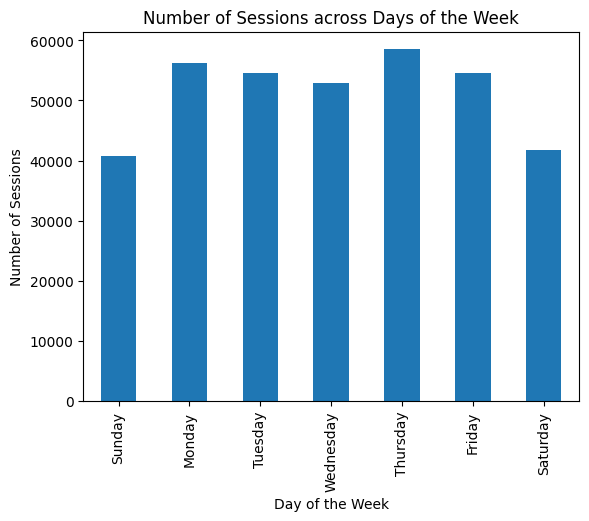

In [ ]:
# Let's plot this across days of the week. We'll need another library
import matplotlib.pyplot as plt

visits['day_of_week'] = visits['end ts'].dt.day_name()

# create a new column
sessions_by_day = visits.groupby('day_of_week')['end ts'].size()

# order the days of the week
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the sessions across days of the week
sessions_by_day.loc[ordered_days].plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sessions')
plt.title('Number of Sessions across Days of the Week')
plt.show()

# this result gives us insight as to which days are the busiest!


##### What is the length of each session?

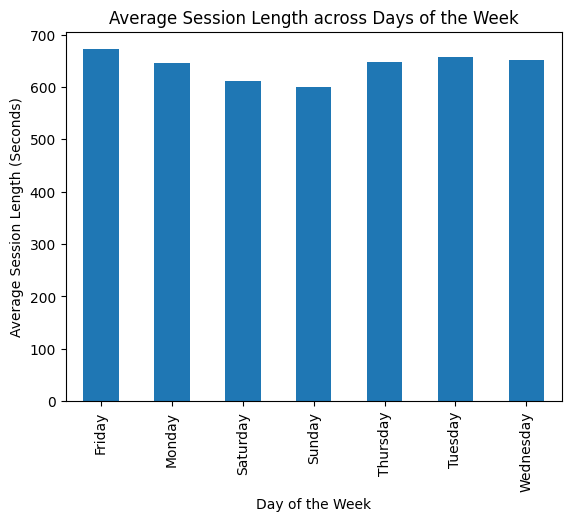

In [ ]:
# let's subtract start ts from end ts and create a new column
visits['session_length'] = visits['end ts'] - visits['start ts']

# let's visualize this across days of the week

# Group by day of the week and calculate average session length
avg_session_length = visits.groupby('day_of_week')['session_length'].mean()

# Convert session length to total seconds
avg_session_length = avg_session_length.dt.total_seconds()

# Plotting the average session length across days of the week
avg_session_length.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Session Length (Seconds)')
plt.title('Average Session Length across Days of the Week')
plt.show()


##### What's the user retention rate?

In [51]:
# we'll find the first session for each user

min_visit = visits.groupby(['uid'])['start ts'].min().reset_index()
min_visit.columns = ['uid', 'first_session']
min_visit.head()

,uid,first_session
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [52]:
# now we'll merge that dataset to the original dataset
visits = visits.merge(min_visit, how='inner', on=['uid'])
visits.head()

,device,end ts,source id,start ts,uid,week,month,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,10,3,2018-03-09 20:05:00


Now we're moving into cohort analysis. Our cohorts and age calculations will be done from a monthly perspective.

We have two parameters:

Cohort: monthly cohort when the user registered/had first session.

age: difference between current session and first_session (kept in 'month' units)

In [60]:
import numpy as np

visits['cohort'] = visits['first_session'].dt.month
visits['age'] = ((pd.to_datetime(visits['start ts']) - pd.to_datetime(visits['first_session'])) / np.timedelta64(1, 'M')).round().astype('int')

visits.head()

,device,end ts,source id,start ts,uid,week,month,first_session,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017-12-20 17:20:00,12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018-02-19 16:53:00,2,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017-07-01 01:54:00,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018-03-09 20:05:00,3,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,10,3,2018-03-09 20:05:00,3,0


In [61]:
# now we can see how many users were active from certain cohorts after registration

cohorts = visits.pivot_table(
    index='cohort',
    columns='age',
    values='uid',
    aggfunc='nunique'
).fillna(0)

cohorts

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
1,22624.0,1219.0,812.0,584.0,389.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22197.0,1070.0,590.0,403.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20589.0,860.0,515.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15709.0,629.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15273.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,13259.0,986.0,710.0,813.0,921.0,880.0,847.0,740.0,743.0,661.0,550.0,526.0,176.0
7,13140.0,747.0,680.0,705.0,743.0,640.0,591.0,645.0,489.0,383.0,321.0,71.0,0.0
8,10181.0,705.0,629.0,602.0,522.0,426.0,423.0,345.0,297.0,234.0,33.0,0.0,0.0
9,16704.0,1278.0,1110.0,826.0,669.0,663.0,554.0,429.0,334.0,43.0,0.0,0.0,0.0


In [62]:
retention = cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
1,1.0,0.053881,0.035891,0.025813,0.017194,0.001856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.0,0.048205,0.026580,0.018156,0.002027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.041770,0.025013,0.003740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,0.040041,0.004265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1.0,0.006744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1.0,0.074365,0.053549,0.061317,0.069462,0.066370,0.063881,0.055811,0.056037,0.049853,0.041481,0.039671,0.013274
7,1.0,0.056849,0.051750,0.053653,0.056545,0.048706,0.044977,0.049087,0.037215,0.029148,0.024429,0.005403,0.000000
8,1.0,0.069247,0.061782,0.059130,0.051272,0.041843,0.041548,0.033887,0.029172,0.022984,0.003241,0.000000,0.000000
9,1.0,0.076509,0.066451,0.049449,0.040050,0.039691,0.033166,0.025682,0.019995,0.002574,0.000000,0.000000,0.000000


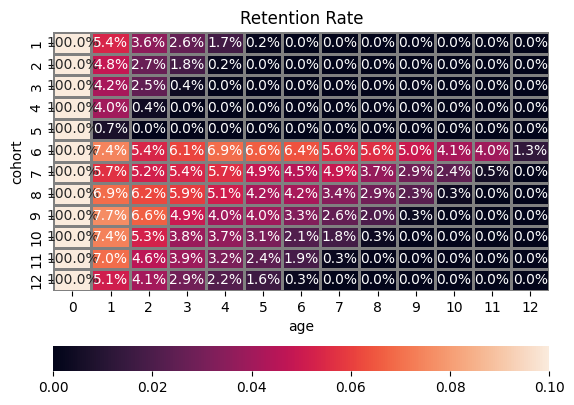

In [66]:
# now we can visualize it!

import seaborn as sns

retention.index = retention.index.astype(str)
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1, cbar_kws= {'orientation': 'horizontal'}).set(title = 'Retention Rate')

plt.show()

##### When do people start buying?

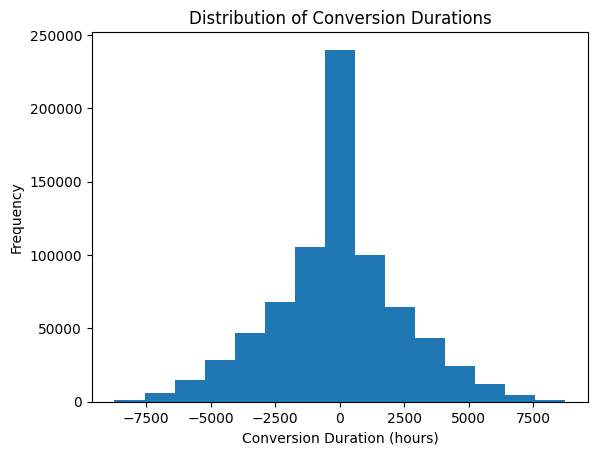

In [73]:
# to answer this question, we'll need to merge the visits database and the orders database.
# we need the ['start ts'] column from visits and the ['buy ts'] column from orders.
# LOOK AT WORKSHOP TABLE - HOW CAN I RECREATE PURCHASES DATAFRAME
merged_data = pd.merge(visits, orders, on=['uid'], how='inner')

# creating a new column
merged_data['conversion_duration'] = merged_data['buy ts'] - merged_data['start ts']

# now we'll plot the distribution of the converstion duration
plt.hist(merged_data['conversion_duration'].dt.total_seconds() / (60 * 60), bins=15)
plt.xlabel('Conversion Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Conversion Durations')
plt.show()

##### How many orders do they make during a given period of time?

In [ ]:
# First let's select a date range

start_date = pd.to_datetime('2017-06-01')
end_date = pd.to_datetime('2017-07-01')

# filter orders based on the range

filtered_orders = orders[(orders['buy ts'] >= start_date) & (orders['buy ts'] <= end_date)]

# now we can group orders by user ID & count the number of orders per user
order_counts = filtered_orders.groupby('uid')['buy ts'].count()

# sum the orders up!
total_orders = order_counts.sum()

print('Total number of orders during the month of June, 2017:', total_orders)

Total number of orders during the month of June, 2017: 2354


##### What is the average purchase size?

In [75]:
# This can be done fairly easily - we just need to find the mean!

average_purchase_size = orders['revenue'].mean()

print('Average Purchase Size: ', average_purchase_size)

Average Purchase Size:  4.999646930477041


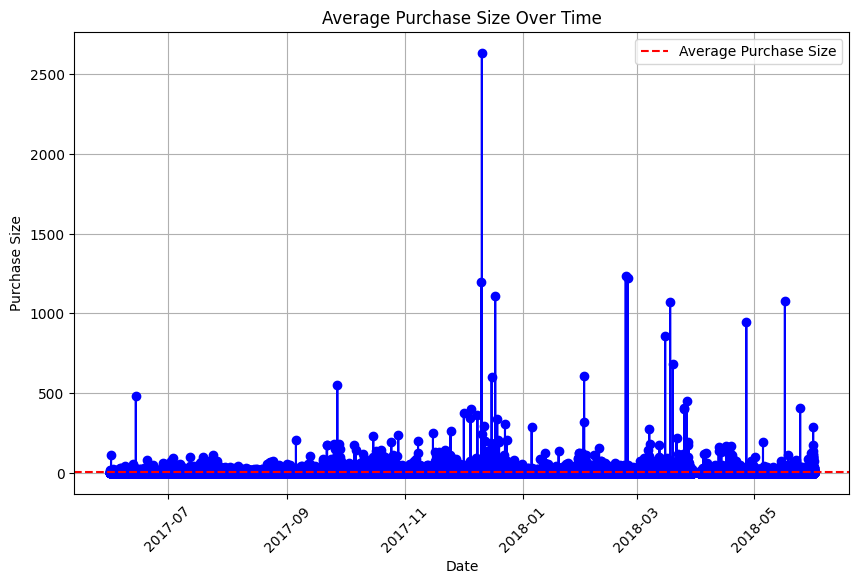

In [76]:
# now we can plot the average purchase size overtime:

plt.figure(figsize=(10, 6))
plt.plot(orders['buy ts'], orders['revenue'], marker='o', linestyle='-', color='blue')
plt.axhline(y=average_purchase_size, linestyle='--', color='red', label='Average Purchase Size')
plt.xlabel('Date')
plt.ylabel('Purchase Size')
plt.title('Average Purchase Size Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### How much money do they bring? (LTV)

In [ ]:
# let's find the first session for each user
min_visit=orders.groupby(['uid'])['buy ts'].min().reset_index()
min_visit.columns = ['uid', 'first_session']
min_visit.head()

,uid,first_session
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [ ]:
# now merging to the original dataset
orders=orders.merge(min_visit, how='inner',on=['uid'])
orders.head()

,buy ts,revenue,uid,order_date,order_month,first_session
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01 07:58:00


In [ ]:
import numpy as np

orders['cohort'] = orders['first_session'].astype('datetime64[M]')
orders['age'] = ((pd.to_datetime(orders['buy ts']) - pd.to_datetime(orders['first_session'])) / np.timedelta64(1,'M'))\
                                                                        .round().astype('int')
orders.head()

,buy ts,revenue,uid,order_date,order_month,first_session,cohort,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01 00:10:00,2017-06-01 00:10:00,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06-01 00:25:00,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01 00:27:00,2017-06-01 00:27:00,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01 00:29:00,2017-06-01 00:29:00,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01 07:58:00,2017-06-01 07:58:00,0


In [ ]:
import seaborn as sns

retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

# the first line just formats cohort into a str for a nicer output
# retention.index=retention.index.astype(str)
# sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
           # ).set(title = 'Retention Rate')
# plt.show()

In [ ]:
# Let's find the LTV. We need to find the date of each customer's purchase

orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

# convert 'first_order_month' column to proper month format
first_orders['first_order_month'] = pd.to_datetime(first_orders['first_order_month']).dt.to_period('M')

# Display the updated dataframe
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [ ]:
# great, looking good. 1st step complete - now we'll calculate the number of new customers for each month

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [ ]:
# now we can build cohorts

orders_ = pd.merge(orders, first_orders, on='uid')
orders_.head()

,buy ts,revenue,uid,order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06


In [ ]:
# we'll now group the table of orders by month of first purchase and month of purchase, then sum up revenue

cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06,2017-06-01 00:10:00,17.00
1,2017-06,2017-06-01 00:25:00,0.55
2,2017-06,2017-06-01 00:27:00,0.37
3,2017-06,2017-06-01 00:29:00,0.55
4,2017-06,2017-06-01 07:58:00,0.37


In [ ]:
# adding data on how many users made their first purchases in each month to the cohorts table

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06,2023,2017-06-01 00:10:00,17.00
1,2017-06,2023,2017-06-01 00:25:00,0.55
2,2017-06,2023,2017-06-01 00:27:00,0.37
3,2017-06,2023,2017-06-01 00:29:00,0.55
4,2017-06,2023,2017-06-01 07:58:00,0.37


##### How much money was spent? Overall, per source and over time.

In [85]:
costs = costs.sort_values(by=['dt', 'source_id'])
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
363,2,2017-06-01,132.56
726,3,2017-06-01,349.38
1089,4,2017-06-01,76.74
1452,5,2017-06-01,73.24


In [86]:
# First let's sum up the amount of money that was spent in the costs dataframe!

overall_money_spent = costs['costs'].sum()
print('Overall Money Spent: ', overall_money_spent)

Overall Money Spent:  329131.62


In [87]:
# now let's group the amount by source. 'source id' is the column we're looking for.

money_spent_per_source = costs.groupby('source_id')['costs'].sum()
print('Money Spent per Source: ', money_spent_per_source)

Money Spent per Source:  source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


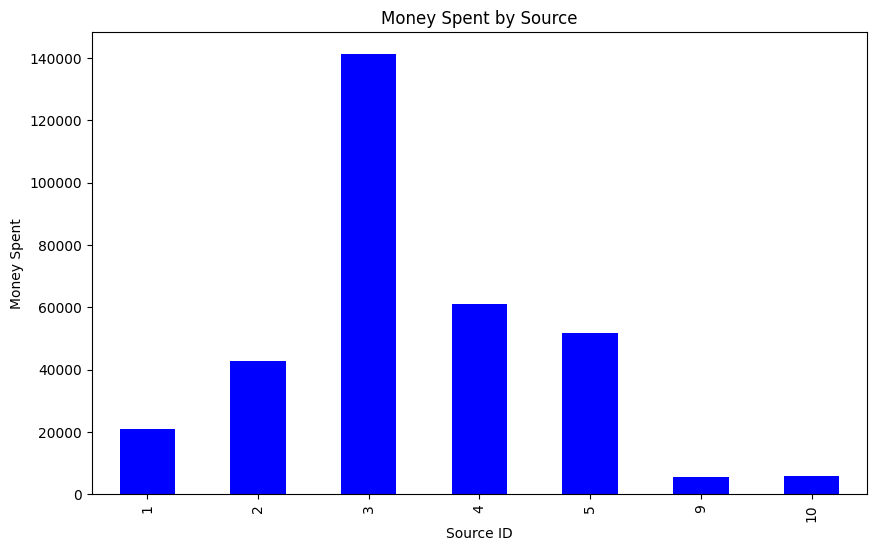

In [ ]:
# Plotting the money spent by source as a bar chart
plt.figure(figsize=(10, 6))
money_spent_per_source.plot(kind='bar', color='b')
plt.xlabel('Source ID')
plt.ylabel('Money Spent')
plt.title('Money Spent by Source')
plt.show()

In [ ]:
# let's group the amount by time:

money_spent_over_time = costs.groupby('dt')['costs'].sum()
print('Money Spent Over Time: ', money_spent_over_time)

Money Spent Over Time:  dt
2017-06-01     735.26
2017-06-02     721.19
2017-06-03     450.85
2017-06-04     761.16
2017-06-05     821.44
               ...   
2018-05-27     532.87
2018-05-28     619.44
2018-05-29     784.79
2018-05-30    1183.00
2018-05-31    2153.70
Name: costs, Length: 364, dtype: float64


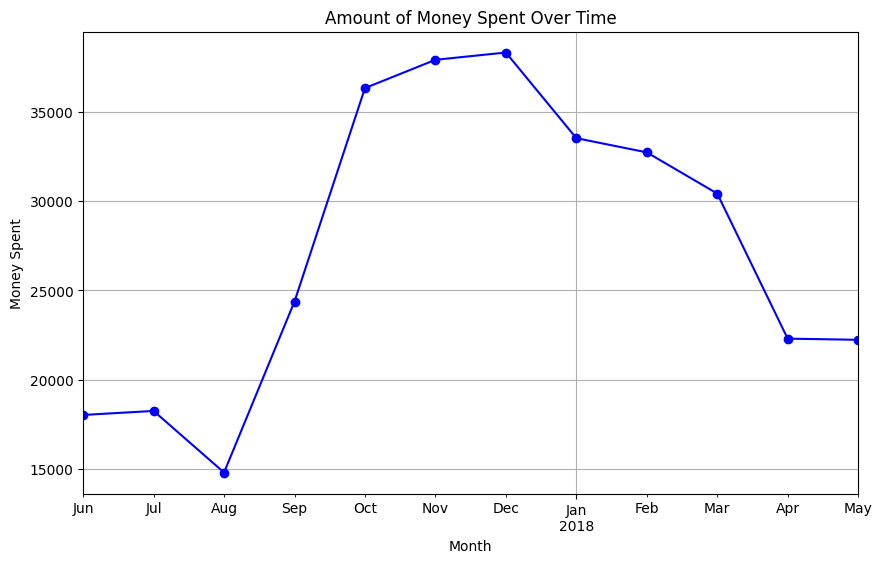

In [ ]:
# now let's plot it!

# Group by month and calculate the sum of costs
money_spent_over_time = costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum()

# Plotting the amount of money spent over time
plt.figure(figsize=(10, 6))
money_spent_over_time.plot(kind='line', marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Money Spent')
plt.title('Amount of Money Spent Over Time')
plt.grid(True)
plt.show()

##### How much did customer acquisition from each of the sources cost?

In [90]:
costs_by_month = costs.groupby(['money_spent_over_time'])['money_spent_per_source'].sum().reset_index()
costs_by_month.head()

KeyError: 'money_spent_over_time'

In [93]:
# we can get the source of each user with the following:

visits.groupby(['uid'])['source id'].nunique().head()

uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: source id, dtype: int64

In [95]:
# we will define the first source that they came from as the main source

first_source = visits.sort_values('start ts').groupby('uid').first()['source id'].reset_index()
first_source.columns = ['uid', 'first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [96]:
visits = visits.merge(first_source, on=['uid'], how='left')
visits.head()

,device,end ts,source id,start ts,uid,week,month,first_session,cohort,age,first_source
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017-12-20 17:20:00,12,0,4
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018-02-19 16:53:00,2,0,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017-07-01 01:54:00,7,0,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018-03-09 20:05:00,3,2,4
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,10,3,2018-03-09 20:05:00,3,0,4


In [ ]:
# Update column name in visits dataframe
visits.rename(columns={'source id': 'source_id'}, inplace=True)

# Merge orders and costs dataframes
merged_data = visits.merge(costs, left_on='source_id', right_on='source_id')

# Calculate total costs per source
total_costs = merged_data.groupby('source_id')['costs'].sum()

# Calculate number of unique customers per source
unique_customers = merged_data.groupby('source_id')['uid'].nunique()

# Calculate customer acquisition cost per source
cac = total_costs / unique_customers

# Create a bar plot of customer acquisition cost
cac.plot(kind='bar', figsize=(10, 6))
plt.title('Customer Acquisition Cost by Source')
plt.xlabel('Source ID')
plt.ylabel('Customer Acquisition Cost')
plt.show()

##### How worthwhile where the investments? (ROI)

- In the workshop, Reyhan creates a purchases dataframe that is used for many of the tasks. I don't understand how he created that purchases dataframe.

- How do I find the user retention rate? My current version doesn't look right.

- Working on finding LTV - how do I calculate margin rate? I believe I need that to move forward. https://practicum.com/trainer/data-analyst/lesson/ceed3c45-bc05-41be-ad98-279a4314aa3b/task/e1e25b7e-87aa-4988-9d16-ac0357afc6de/

- Finding overall money spent per source - do I need to merge both visits and costs dataframe? Or orders and costs? Or all three?

- is my answer to the average order size sufficient?

- my distribution of conversion durations doesn't look quite right. In the workshop, there's a 'target' column - we don't have that here.

- how do I order my days in line 20?

- How much did customer acquisition cost?

## Conclusion